# Cardiovascular Disease Prediction


# Problem Statement
In the course of medical examination, most of the patients were detected with cardiovascular disease. You have to find out the precise medical reasons and insights of having cardiovascular disease by analysing the various features of this dataset.

# Data Description
There are 3 types of input features:  
* Objective - Factual information
* Examination - Results of medical examination
* Subjective - Information given by the patient

# Features
* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

# Observation
* Age - The values of 'age' column is in unit of days. So, this will be changed to years for better understanding.
* Gender - The values of 'gender' column are 1 and 2. In this, '1' is indicated as women and '2' as men. For better computation, the column name should be changed from 'gender' to 'male' and the values should be changed into 0 as women and 1 as men. 
* Height - The unit of height is in centimeter (cm). There are various incorrect values recorded in the dataset which cannot be considerd as height. So these outliers should be removed and only the normal human height of the patients should be considered. Those with abnormal small heights (risk of Achondroplasia or dwarfism) and tall heights (risk of atrial fibrillation) may have confirmed risk of cardiovascular diseases from an early stage of their life, which would affect the data analysis for the focused parameters.
* Weight - The values of 'weight' column is in unit of kilogram (kg).
* BMI (Body-mass index) - A column of bmi and bmi_class is required to better understand the healthy weight parameter of the patients in terms of their height.
* Blood pressure (ap_hi / ap_lo) - The unit of blood pressure can be assumed to be in mmHg. The minimum value of blood pressure is negative which is highly unlikely as normal blood pressure should be between 120/90 and the maximum value is above 10,000 which is also highly unlikely. So, the patients having blood pressure reading (Systolic/Diastolic) above 370/360 and below 40/20 should be removed.
* Cholesterol - The cholesterol level are indicated as 1, 2 and 3, where 1 is normal, 2 is above normal and 3 is well above normal.  For better computation, it should be changed into 0 as normal, 1 as above normal and 2 as well above normal.
* Glucose - The glucose level are indicated as 1, 2 and 3, where 1 is normal, 2 is above normal and 3 is well above normal. For better computation, it should be changed into 0 as normal, 1 as above normal and 2 as well above normal.
* Smoking - In the 'smoke' column, the value '0' means that the patient don't smokes and value '1' means that the patient smokes.
* Alcohol consumption - In the 'alco' column, the value '0' means that the patient don't drink alcohol and value '1' means that the patient drink alcohol. The name of column should be changed into 'alcohol_intake' for better understanding.
* Physical activity - In the 'active' column, the value '0' means that the patient is non-active and '1' means that the patient is active.  

The information about smoking, alcohol consumption and physical activity are subjective features which are given by the patients. These data may not be reliable but can provide a better insight of patient conditions. 
* Cardiovascular disease occurrence - This is a target variable which provides the information about the presence or absence of cardiovascular disease. In the 'cardio' column, the value '0' means absence of cardiovascular disease and '1' means presence of cardiovascular disease. The name of this 'cardio' column should be changed into 'cvd' for better understanding.
In this dataset, near about half of the subjects have cardiovascular diseases.


# Methodology

## Importing Packages

In [2]:
# pip install numpy pandas matplotlib seaborn

## Importing Libraries

In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
from decimal import Decimal
warnings.filterwarnings('ignore')

## Loading The Dataset

In [4]:
df = pd.read_csv("cardio_train.csv", sep = ";")

In [5]:
# This code will help in loading all the records of the dataset when any command will be run to output the dataframe.
pd.options.display.max_rows = 10000000
pd.options.display.max_columns = 10000000

## Exploring And Cleaning The Data

In [6]:
df.head(10)  # Provides us the starting 10 rows of the dataset.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [7]:
df.shape  # Provides the total rows and columns.

(70000, 13)

In [8]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [10]:
# To find the missing value in the table.
df.isnull().sum()
# Results showed that there is no missing values in the columns of the dataset.

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### Age

In [11]:
# The age column is in unit of days, instead of years. So, the data of age column will be corrected to years, to better understand the age.
df["age"] = df["age"].apply(lambda x: round(x/365))

In [12]:
df.head(4)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1


In [13]:
# describe() is used to view some basic statistical details like percentile, mean, std etc of a data frame or a series of numeric values. 
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


The minimum and maximum age of the 'age' column shows that this dataset consist records of adult patients inclusively between the age-group of 30 to 65. 

<Axes: >

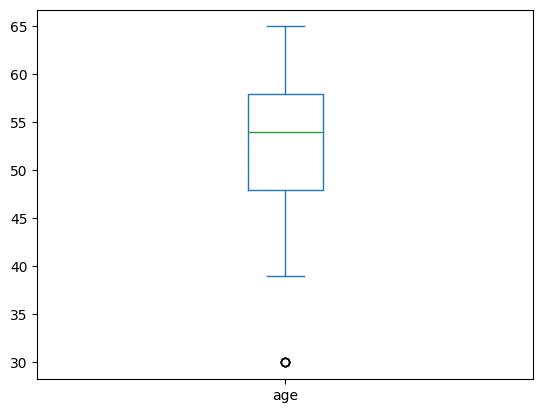

In [14]:
# To check the variance in the values of age by box plot.
df['age'].plot(kind = 'box')

In [15]:
# The age value of patients above 35 is very large.
(df["age"] > 35).value_counts()/len(df["age"])*100

age
True     99.994286
False     0.005714
Name: count, dtype: float64

In [16]:
# The age value of patients below 35 is very small.
(df["age"] < 35).value_counts()/len(df["age"])*100

age
False    99.994286
True      0.005714
Name: count, dtype: float64

### Gender

In [17]:
# The gender values are mentioned by 1 as women and 2 as men in the dataset. 
# To check the percentage of each gender value in 'gender' column.
df["gender"].value_counts()/len(df["gender"])*100

gender
1    65.042857
2    34.957143
Name: count, dtype: float64

In [18]:
# For better computation, the gender values should be changed into 0 as women and 1 as men.
df["gender"] = df["gender"].apply(lambda x: x-1)

In [19]:
# Changed the column name 'gender' into 'male'.
df.rename(columns = {"gender": "male"}, inplace = True)
df.head() 

,id,age,male,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,2,52,0,165,64.0,130,70,3,1,0,0,0,1
3,3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,4,48,0,156,56.0,100,60,1,1,0,0,0,0


In [20]:
# Percentage of each value present in 'male' column.
df["male"].value_counts()/len(df["male"])*100

male
0    65.042857
1    34.957143
Name: count, dtype: float64

In the dataset, most of the patients are women. 65% are women and 35% are men.

### Height

<Axes: >

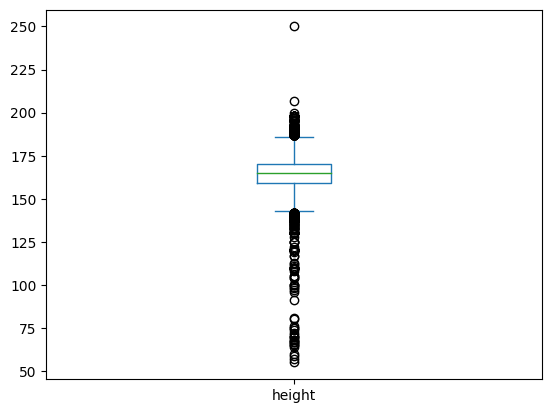

In [21]:
# To check the variance in the values of height by box plot.
df['height'].plot(kind = 'box')

In [22]:
# For outliers, the condition Achondroplasia, also known as dwarfism, will be taken as a lower limit.  
# Those with Achondroplasia may have an increased risk of cardiovascular diseases, which would affect the data analysis of the focused parameters.
# Checking the percent of record, below the height 148cm.
(df["height"] < 148).value_counts()/len(df)*100

height
False    98.72
True      1.28
Name: count, dtype: float64

In [23]:
# The height of patients below 148cm is removed due to high chances of Achondroplasia. It is only 1.28% of the data.
df = df[df["height"] > 148]

In [24]:
# From the box plot of height, it can be observed that there are only 2 data points above 200cm.
# Checking the percent of record, above the height of 200cm.
(df["height"] > 200).value_counts()/len(df)*100

height
False    99.997093
True      0.002907
Name: count, dtype: float64

In [25]:
# The records of patients having height above 200cm should be removed because tall people (tallness due to gigantism, acromegaly or any other medical condition) mostly have a higher risk of atrial fibrillation, heart and varicose veins related problems.
df = df[df["height"] < 200]

In [26]:
df.describe()

,id,age,male,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68801.000000,68801.000000,68801.000000,68801.000000,68801.000000,68801.000000,68801.000000,68801.000000,68801.000000,68801.000000,68801.000000,68801.000000,68801.000000
mean,49953.781515,53.304225,0.354559,164.745207,74.360201,128.826950,96.609337,1.365271,1.226218,0.089330,0.054214,0.803796,0.498946
std,28848.596379,6.764190,0.478383,7.520058,14.293399,155.323177,189.388776,0.679083,0.572113,0.285222,0.226442,0.397127,0.500003
min,0.000000,30.000000,0.000000,149.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25009.000000,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49975.000000,54.000000,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74842.000000,58.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,1.000000,198.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Weight And BMI

<Axes: >

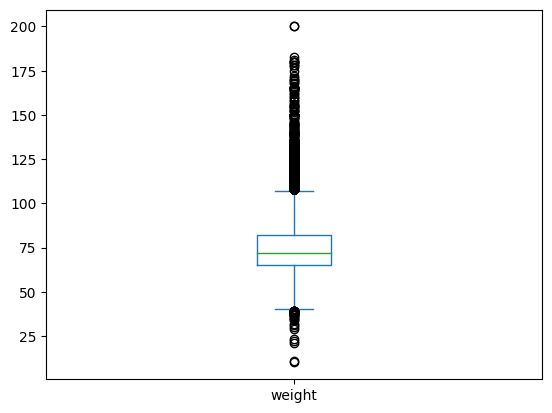

In [27]:
# To check the variance in the values of weight by box plot.
df['weight'].plot(kind = 'box')

In [28]:
# The patients who are below 37kg, comes under the abnormal category of adult human weight. The abnormal low weight of patient can confirm their chance of having any particular medical condition (like dwarfism) or any other disease due to which their weight is low and this would affect the data analysis of the focused parameters.
# Checking the percent of record, below the weight of 37kg.
(df["weight"] < 37).value_counts()/len(df)*100

weight
False    99.979651
True      0.020349
Name: count, dtype: float64

In [29]:
# The weight of patients below 37kg is removed due to high chances of having any particular medical condition (like dwarfism) or any other disease due to which the patient's weight is low. It is only 0.02% of the data.
df = df[df["weight"] > 37]

In [30]:
# The patients who are above 110kg, comes under the abnormal category of adult human weight. The abnormal high weight of patient can confirm their chance of having any particular medical condition (like gigantism and acromegaly) or any other disease due to which their weight is high and this would affect the data analysis of the focused parameters.
# Checking the percent of record, above the weight of 110kg.
(df["weight"] > 110).value_counts()/len(df)*100

weight
False    98.211741
True      1.788259
Name: count, dtype: float64

In [31]:
# The patients having weight above 110kg should be removed because heavy weight patient have confirmatory chances of having any particular medical condition (like gigantism and acromegaly) or any other disease due to which their weight is high. It is only 1.79% of the data.
df = df[df["weight"] < 110]

In [32]:
df.describe()

,id,age,male,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67301.000000,67301.000000,67301.000000,67301.000000,67301.000000,67301.000000,67301.000000,67301.000000,67301.000000,67301.000000,67301.000000,67301.000000,67301.000000
mean,49930.444228,53.302923,0.352506,164.654923,73.361496,128.595207,95.983552,1.358880,1.221334,0.088379,0.053476,0.804253,0.494331
std,28856.190003,6.765527,0.477754,7.457378,12.548220,157.005959,189.400525,0.674156,0.567141,0.283848,0.224983,0.396778,0.499972
min,0.000000,30.000000,0.000000,149.000000,38.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24962.000000,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49926.000000,54.000000,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74812.000000,58.000000,1.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,1.000000,198.000000,109.700000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# Adding a new parameter for Body Mass Index (bmi), a metric used to classify weight per height class.
# This will be a better indicator of health using weight and height.
# BMI = kg/m^2
df["bmi"] = df["weight"] *10000 / ((df["height"])**2)
df.head()

,id,age,male,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52,0,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48,0,156,56.0,100,60,1,1,0,0,0,0,23.011177


BMI Class

The BMI class can be categorised as:
* 0 - Anorexic (BMI <= 15)
* 1 - Underweight (15 < BMI <= 18.5)
* 2 - Normal weight (18.5 < BMI <= 25)
* 3 - Overweight (25 < BMI <= 30)
* 4 - Obesity Class-I (30 < BMI <= 35)
* 5 - Obesity Class-II (35 < BMI <= 40)
* 6 - Obesity Class-III (BMI > 40)


In [34]:
# Now the bmi can be split into classes of bmi, which would help understand the data more.
bmi_ranges = [
    (df["bmi"] <= 15),                         # 0 - Anorexic
    (df["bmi"] > 15) & (df["bmi"] <= 18.5),    # 1 - Underweight
    (df["bmi"] > 18.5) & (df["bmi"] <= 25),    # 2 - Normal weight
    (df["bmi"] > 25) & (df["bmi"] <= 30),      # 3 - Overweight
    (df["bmi"] > 30) & (df["bmi"] <= 35),      # 4 - Obesity Class I
    (df["bmi"] > 35) & (df["bmi"] <= 40),      # 5 - Obesity Class II
    (df["bmi"] > 40)                           # 6 - Obesity Class III 
]

classes = [0, 1, 2, 3, 4, 5, 6]

df["bmi_class"] = np.select(bmi_ranges, classes)
df.head()

,id,age,male,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_class
0,0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.967120,2
1,1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.927679,4
2,2,52,0,165,64.0,130,70,3,1,0,0,0,1,23.507805,2
3,3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.710479,3
4,4,48,0,156,56.0,100,60,1,1,0,0,0,0,23.011177,2


In [35]:
# To change the position of column 'bmi' and 'bmi_class' from the end to the next of the weight column.
df = df.iloc[:,[0, 1, 2, 3, 4, 13, 14, 5, 6, 7, 8, 9, 10, 11, 12]] 

In [36]:
df.head(4) 

,id,age,male,height,weight,bmi,bmi_class,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,1,168,62.0,21.967120,2,110,80,1,1,0,0,1,0
1,1,55,0,156,85.0,34.927679,4,140,90,3,1,0,0,1,1
2,2,52,0,165,64.0,23.507805,2,130,70,3,1,0,0,0,1
3,3,48,1,169,82.0,28.710479,3,150,100,1,1,0,0,1,1


The bmi class 0 (=<15) alludes to an extremely severe case of anorexia in the patient. This 'bmi_class' column will be created as a new label to account for the condition and to assess if it affects the cardio column.

### Blood Pressure

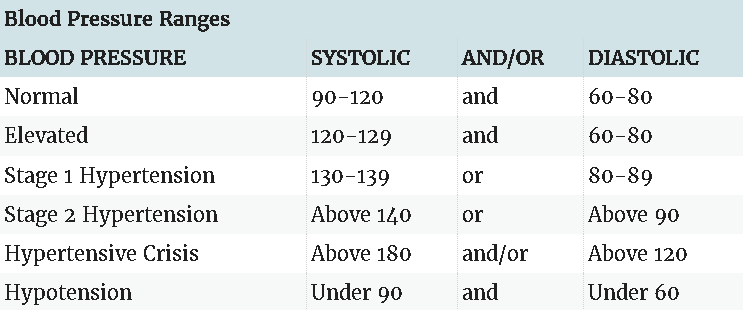

<Axes: title={'center': 'Blood Pressure Data'}, xlabel='Systolic Blood Pressure (mmHg)', ylabel='Diastolic Blood Pressure (mmHg)'>

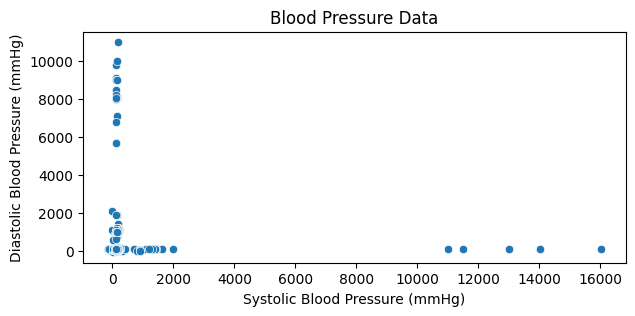

In [37]:
# Checking the blood pressure distribution of 'ap_hi' and 'ap_lo' columns for outliers.
plt.figure(figsize = (7,3))
plt.title("Blood Pressure Data")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Diastolic Blood Pressure (mmHg)")
sns.scatterplot(data = df, x = "ap_hi", y = "ap_lo")

<Axes: title={'center': 'Blood Pressure Data'}, xlabel='Systolic Blood Pressure (mmHg)', ylabel='Diastolic Blood Pressure (mmHg)'>

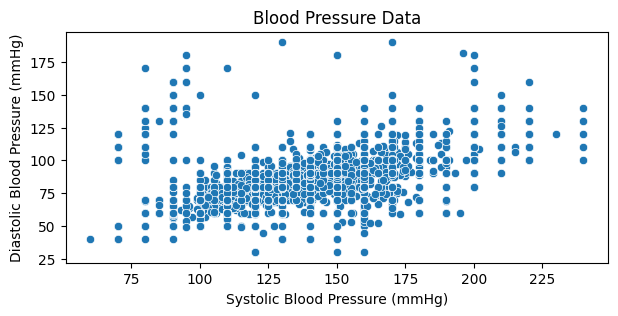

In [38]:
# The range of blood pressure mentioned in the dataset is exceeding out 400mmHg. So, the values of systolic pressure (ap_hi) above 40mm-Hg and below 370mmHg, whereas diastolic pressure (ap_lo) above 20mmHg and below 360mmHg, should be taken into consideration.
plt.figure(figsize = (7,3))
plt.title("Blood Pressure Data")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Diastolic Blood Pressure (mmHg)")
sns.scatterplot(data = df[(df["ap_hi"] < 370) & (df["ap_lo"] < 360) & (df["ap_hi"] > 40) & (df["ap_lo"] > 20)], x = "ap_hi", y = "ap_lo")

In [39]:
# The percentage of number of records of patients having systolic pressure (ap_hi) above 40mmHg and below 370mmHg, whereas diastolic pressure (ap_lo) above 20mmHg and below 360mmHg. 
len(df[(df["ap_hi"] < 370) & (df["ap_lo"] < 360) & (df["ap_hi"] > 40) & (df["ap_lo"] > 20)]) / len(df) * 100

98.32246177619946

In [40]:
# Remove the outliers that are above the blood pressure reading (Systolic/Diastolic) of 370/360 and below 40/20 because these values cannot be considered as the blood pressure value of any human patient.
df = df[(df["ap_hi"] < 370) & (df["ap_lo"] < 360) & (df["ap_hi"] > 40) & (df["ap_lo"] > 20)]

### Cholesterol
The 'cholesterol' column tells us the level of cholesterol of the patient which is categorised as:
* 1 - Normal
* 2 - Above Normal
* 3 - Well Above Normal

In [41]:
# The cholesterol options are mentioned by 1 as normal, 2 as above normal and 3 as well above normal. For better computation, it should be changed into 0 as normal, 1 as above normal and 2 as well above normal.
df["cholesterol"] = df["cholesterol"].apply(lambda x: x-1)
df.head()

,id,age,male,height,weight,bmi,bmi_class,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,1,168,62.0,21.967120,2,110,80,0,1,0,0,1,0
1,1,55,0,156,85.0,34.927679,4,140,90,2,1,0,0,1,1
2,2,52,0,165,64.0,23.507805,2,130,70,2,1,0,0,0,1
3,3,48,1,169,82.0,28.710479,3,150,100,0,1,0,0,1,1
4,4,48,0,156,56.0,23.011177,2,100,60,0,1,0,0,0,0


In [42]:
# To check the percentage of cholesterol level of the patients.
x = df["cholesterol"].value_counts()/len(df["cholesterol"])*100
x.apply(Decimal)
print(x.round(decimals = 1))  # For rounding off the values.

cholesterol
0    75.5
1    13.4
2    11.2
Name: count, dtype: float64


The above result shows that approximately 75.5% of patients have normal, 13.4% have above normal and 11.2% have well above normal level of cholesterol.

### Glucose
This 'gluc' column tells us the level of glucose in the patient which is categorised as:
* 1 - Normal
* 2 - Above Normal
* 3 - Well Above Normal

In [43]:
# Changed the column name 'gluc' into 'glucose'.
df.rename(columns = {"gluc": "glucose"}, inplace = True)
df.head()

,id,age,male,height,weight,bmi,bmi_class,ap_hi,ap_lo,cholesterol,glucose,smoke,alco,active,cardio
0,0,50,1,168,62.0,21.967120,2,110,80,0,1,0,0,1,0
1,1,55,0,156,85.0,34.927679,4,140,90,2,1,0,0,1,1
2,2,52,0,165,64.0,23.507805,2,130,70,2,1,0,0,0,1
3,3,48,1,169,82.0,28.710479,3,150,100,0,1,0,0,1,1
4,4,48,0,156,56.0,23.011177,2,100,60,0,1,0,0,0,0


In [44]:
# The glucose options are mentioned by 1 as normal, 2 as above normal and 3 as well above normal. For better computation, it should be changed into 0 as normal, 1 as above normal and 2 as well above normal.
df["glucose"] = df["glucose"].apply(lambda x: x-1)
df.head()

,id,age,male,height,weight,bmi,bmi_class,ap_hi,ap_lo,cholesterol,glucose,smoke,alco,active,cardio
0,0,50,1,168,62.0,21.967120,2,110,80,0,0,0,0,1,0
1,1,55,0,156,85.0,34.927679,4,140,90,2,0,0,0,1,1
2,2,52,0,165,64.0,23.507805,2,130,70,2,0,0,0,0,1
3,3,48,1,169,82.0,28.710479,3,150,100,0,0,0,0,1,1
4,4,48,0,156,56.0,23.011177,2,100,60,0,0,0,0,0,0


In [45]:
# To check the percentage of glucose level of the patients.
x = df["glucose"].value_counts()/len(df["glucose"])*100
x.apply(Decimal)
print(x.round(decimals = 2)) # For rounding off the values.

glucose
0    85.36
2     7.46
1     7.17
Name: count, dtype: float64


The above result shows that approximately 85.4% of patients have normal, 7.5% have above normal and 7.2% have well above normal level of glucose.

### Smoking
This 'smoke' column tells us whether the patient smokes or not. The value '0' means that the patient don't smokes whereas value '1' means that the patient smokes.

In [46]:
# To check the percentage of non-smoker and smoker in 'smoke' column.
df["smoke"].value_counts()/len(df["smoke"])*100

smoke
0    91.16847
1     8.83153
Name: count, dtype: float64

The above result shows that approximately 91.2% are non-smokers whereas 8.8% are smokers.

### Alcohol Consumption
This column tells us that whether the patient drink alcohol or not. The value '0' means that the patient don't drink alcohol whereas value '1' means that the patient drink alcohol.

In [47]:
# Rename the name of the column 'alco' to 'alcohol_intake' for better understanding.
df.rename(columns = {'alco':'alcohol_intake'}, inplace = True)
df.head()

,id,age,male,height,weight,bmi,bmi_class,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol_intake,active,cardio
0,0,50,1,168,62.0,21.967120,2,110,80,0,0,0,0,1,0
1,1,55,0,156,85.0,34.927679,4,140,90,2,0,0,0,1,1
2,2,52,0,165,64.0,23.507805,2,130,70,2,0,0,0,0,1
3,3,48,1,169,82.0,28.710479,3,150,100,0,0,0,0,1,1
4,4,48,0,156,56.0,23.011177,2,100,60,0,0,0,0,0,0


In [48]:
# To check the percentage of non-smoker and smoker in 'smoke' column.
df["alcohol_intake"].value_counts()/len(df["alcohol_intake"])*100

alcohol_intake
0    94.66844
1     5.33156
Name: count, dtype: float64

The above result shows that approximately 94.7% of patient do not intake alcohol whereas 5.3% intake alcohol.

### Physical Activity
The 'active' column tells us that whether the patient performs regular physical activity or not. The value '0' means that the patient don't do regular physical activity whereas value '1' means that the patient regularly do physical activity.

In [49]:
# To check the percentage of patient performing physical activity or not, as mentioned in 'active' column.
df["active"].value_counts()/len(df["active"])*100

active
1    80.395031
0    19.604969
Name: count, dtype: float64

The above result shows that approximately 80.4% of patient performs regular physical activity whereas 19.6% do not perform regular physical activity.

### Presence Or Absence Of Cardiovascular Disease
This column tells us that whether the patient suffers from cardiovascular disease or not. The value '0' means that the patient don't have cardiovascular disease whereas value '1' means that the patient suffers from cardiovascular disease.

In [50]:
# Rename the name of the column 'cardio' to 'cvd' for better understanding.
df.rename(columns = {'cardio':'cvd'}, inplace = True)
df.head()

,id,age,male,height,weight,bmi,bmi_class,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol_intake,active,cvd
0,0,50,1,168,62.0,21.967120,2,110,80,0,0,0,0,1,0
1,1,55,0,156,85.0,34.927679,4,140,90,2,0,0,0,1,1
2,2,52,0,165,64.0,23.507805,2,130,70,2,0,0,0,0,1
3,3,48,1,169,82.0,28.710479,3,150,100,0,0,0,0,1,1
4,4,48,0,156,56.0,23.011177,2,100,60,0,0,0,0,0,0


In [51]:
# To check the percentage of patients having cardiovascular disease or not as given in the 'cvd' column.
df["cvd"].value_counts()/len(df["cvd"])*100

cvd
0    51.023091
1    48.976909
Name: count, dtype: float64

The above result shows that approximately 51% of patients do not have cardiovascular disease whereas 49% of patients suffers from cardiovascular disease.

## Data Analysis And Visualization

In [52]:
df.head()

,id,age,male,height,weight,bmi,bmi_class,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol_intake,active,cvd
0,0,50,1,168,62.0,21.967120,2,110,80,0,0,0,0,1,0
1,1,55,0,156,85.0,34.927679,4,140,90,2,0,0,0,1,1
2,2,52,0,165,64.0,23.507805,2,130,70,2,0,0,0,0,1
3,3,48,1,169,82.0,28.710479,3,150,100,0,0,0,0,1,1
4,4,48,0,156,56.0,23.011177,2,100,60,0,0,0,0,0,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66172 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              66172 non-null  int64  
 1   age             66172 non-null  int64  
 2   male            66172 non-null  int64  
 3   height          66172 non-null  int64  
 4   weight          66172 non-null  float64
 5   bmi             66172 non-null  float64
 6   bmi_class       66172 non-null  int32  
 7   ap_hi           66172 non-null  int64  
 8   ap_lo           66172 non-null  int64  
 9   cholesterol     66172 non-null  int64  
 10  glucose         66172 non-null  int64  
 11  smoke           66172 non-null  int64  
 12  alcohol_intake  66172 non-null  int64  
 13  active          66172 non-null  int64  
 14  cvd             66172 non-null  int64  
dtypes: float64(2), int32(1), int64(12)
memory usage: 7.8 MB


### Analysis Of Age

In [54]:
df.describe()

,id,age,male,height,weight,bmi,bmi_class,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol_intake,active,cvd
count,66172.000000,66172.000000,66172.000000,66172.000000,66172.000000,66172.000000,66172.000000,66172.000000,66172.000000,66172.000000,66172.000000,66172.000000,66172.000000,66172.00000,66172.000000
mean,49928.544097,53.289730,0.351659,164.655897,73.302305,27.077209,2.919815,126.332240,81.253446,0.356903,0.221015,0.088315,0.053316,0.80395,0.489769
std,28849.276164,6.767243,0.477492,7.447438,12.523284,4.619023,0.953519,16.555141,9.605827,0.672947,0.566965,0.283755,0.224664,0.39701,0.499899
min,0.000000,30.000000,0.000000,149.000000,38.000000,13.520822,0.000000,60.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,24955.750000,48.000000,0.000000,159.000000,65.000000,23.828125,2.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
50%,49932.000000,54.000000,0.000000,165.000000,72.000000,26.175195,3.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
75%,74787.250000,58.000000,1.000000,170.000000,81.000000,29.752066,3.000000,140.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000
max,99999.000000,65.000000,1.000000,198.000000,109.700000,49.096888,6.000000,240.000000,190.000000,2.000000,2.000000,1.000000,1.000000,1.00000,1.000000


The minimum and maximum age of the 'age' column shows that this dataset consist records of adult patients between the age-group of 30 to 65. 

### Analysis Of Age With Respect To BMI

Various classes of BMI are as follows: 
* 0 - Anorexic (BMI <= 15)
* 1 - Underweight (15 < BMI <= 18.5)
* 2 - Normal weight (18.5 < BMI <= 25)
* 3 - Overweight (25 < BMI <= 30)
* 4 - Obesity Class-I (30 < BMI <= 35)
* 5 - Obesity Class-II (35 < BMI <= 40)
* 6 - Obesity Class-III (BMI > 40)

In [55]:
# To check the percentage of patient of different bmi class.
x = df["bmi_class"].value_counts()/len(df["bmi_class"])*100
x.apply(Decimal)
print(x.round(decimals = 2))

bmi_class
2    38.10
3    36.83
4    17.46
5     5.60
6     1.09
1     0.90
0     0.02
Name: count, dtype: float64


The above results showed that 38.1% of the patients have normal weight but 61.9% have heavy weight which can be a problem as it could cause cardiovascular disease. 

In [56]:
# Mean of BMI of a particular aged patients.
df.groupby("age")[[ "bmi"]].mean()

,bmi
age,
30,23.922670
39,26.349226
40,25.738779
41,26.161390
42,25.979576
43,26.200160
44,26.405350
45,26.825199
46,26.530826


Text(0, 0.5, 'BMI')

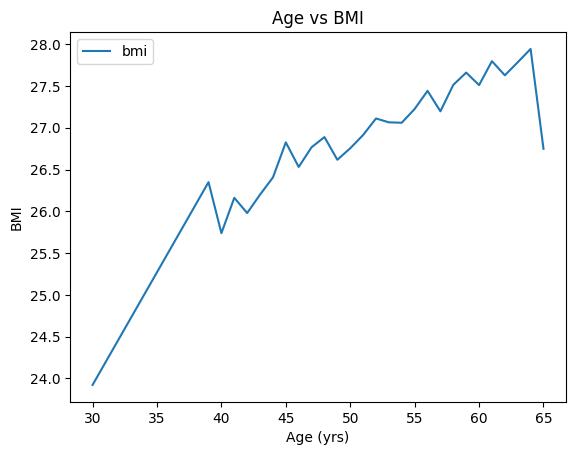

In [57]:
# Plotting age with respect to body-mass index (bmi).
df.groupby("age")[[ "bmi"]].mean().plot()
plt.title("Age vs BMI")
plt.xlabel("Age (yrs)")
plt.ylabel("BMI")

The normal range of bmi comes under 18.5 to 25 for a healthy human. This analysis shows that all the adults examined for this dataset are overweight. The bmi is increasing with age.

### Analysis Of Age With Respect To Blood Pressure

Text(0, 0.5, 'Blood Pressure (mmHg)')

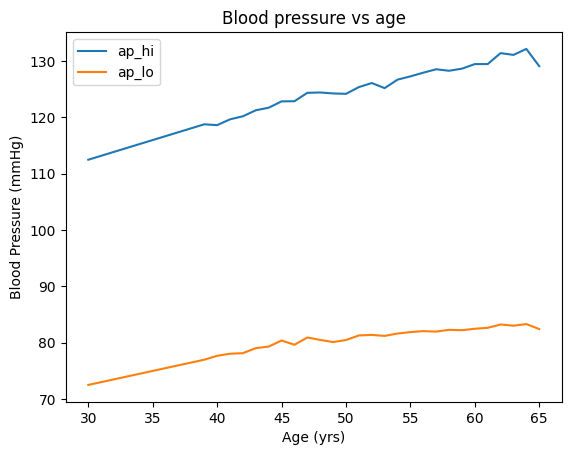

In [58]:
# Plotting age with respect to the blood pressure (both systolic and diastolic)
df.groupby("age")[[ "ap_hi", "ap_lo"]].mean().plot()
plt.title("Blood pressure vs age")
plt.xlabel("Age (yrs)")
plt.ylabel("Blood Pressure (mmHg)")

This analysis of age with respect to blood pressure shows that the blood pressure of the patients increases with age. The patients between the age of 30 to 65 years have an increasing diastolic pressure ranging between 70 to 80mmHg and increasing systolic pressure ranging between 110 to 135mmHg. 

### Analysis Of Age With Respect To Cholesterol Level

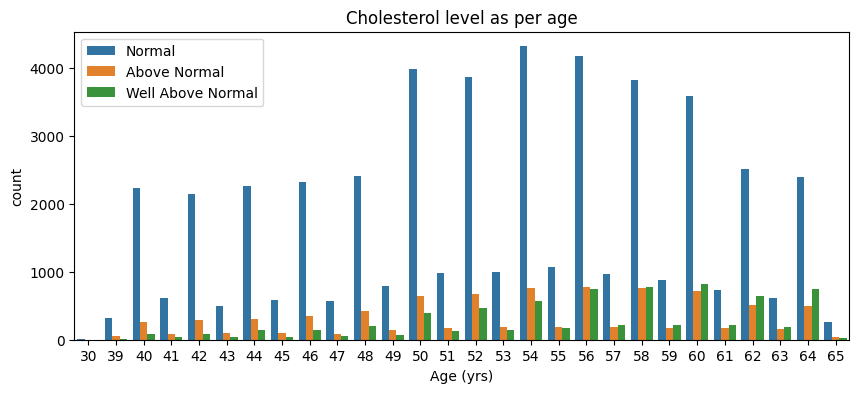

In [59]:
# Plotting age with respect to cholesterol level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "cholesterol")
plt.title("Cholesterol level as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Normal", "Above Normal", "Well Above Normal"])

This anlaysis shows that cholesterol level increases with age and most of the patients have normal cholesterol level. The level of cholesterol of patients fastly starts increasing to go above normal and well above normal mostly at the age of 50 years. When there is too much cholesterol in the blood, it builds up in the walls of the arteries, causing a process called atherosclerosis, a form of heart disease. The arteries become narrowed and bloodflow to the heart muscle is slowed down or blocked. This can cause chest pain (angina) or a heart attack. That's why high cholesterol level in adults can cause a serious problem.

### Analysis Of Age With Respect To Glucose Level

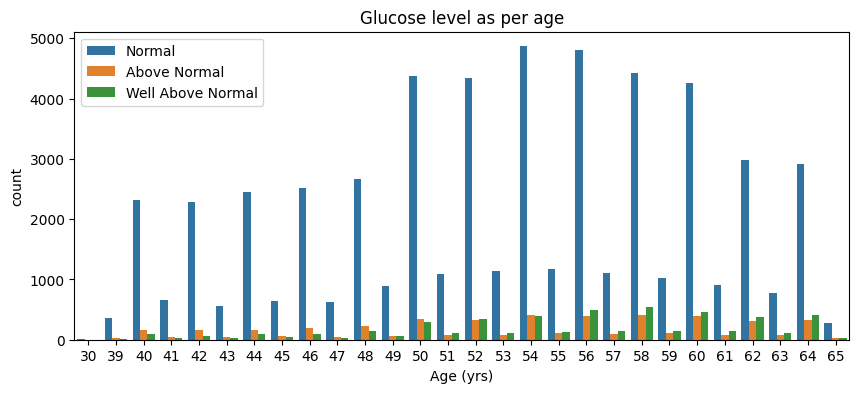

In [60]:
# Plotting age with respect to glucose level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "glucose")
plt.title("Glucose level as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Normal", "Above Normal", "Well Above Normal"])

This anlaysis shows that glucose level of most of the patients are normal. The level of glucose of patients fastly starts increasing to go above normal and well above normal mostly at the age of 50 years. High blood sugar levels can damage blood vessels and the nerves that control the heart over time, leading to an increased risk of heart diseases. 

### Analysis Of Age With Respect To Smoking

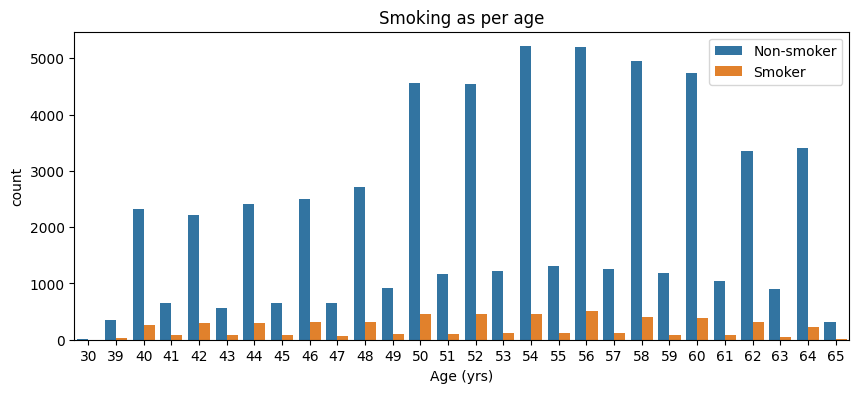

In [61]:
# Plotting age with respect to smoking.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "smoke")
plt.title("Smoking as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Non-smoker", "Smoker"])

This analysis shows that most of the patients don't smoke and with increase in age most of the adults don't prefer to smoke.

### Analysis Of Age With Respect To Alcohol Consumption

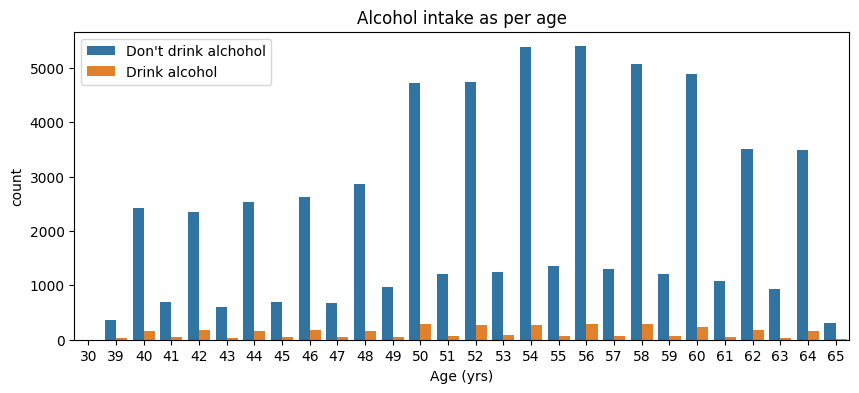

In [62]:
# Plotting age with respect to alcohol consumption.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "alcohol_intake")
plt.title("Alcohol intake as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Don't drink alchohol", "Drink alcohol"])

This analysis shows that most of the patients don't drink alcohol and with increase in age most of the adults don't prefer to drink alcohol.

### Analysis Of Age With Respect To Physical Activity

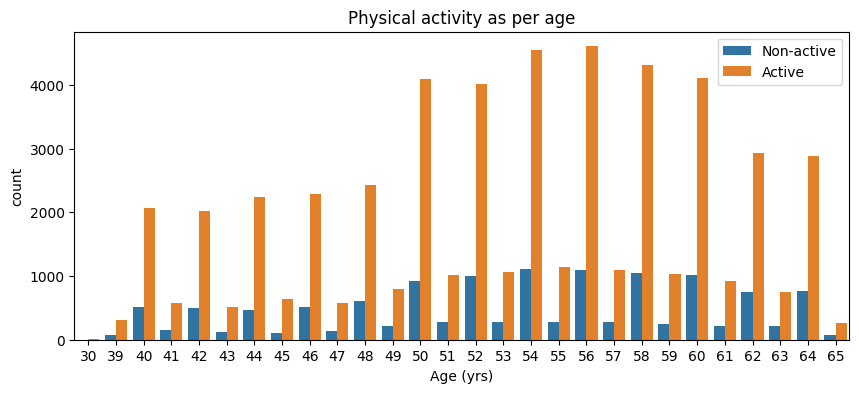

In [63]:
# Plotting age with respect to physical activity.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "active")
plt.title("Physical activity as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Non-active", "Active"])

This analysis shows that most of the patients are physically active.

### Analysis Of Age With Respect To Occurrence Of Cardiovascular Disease

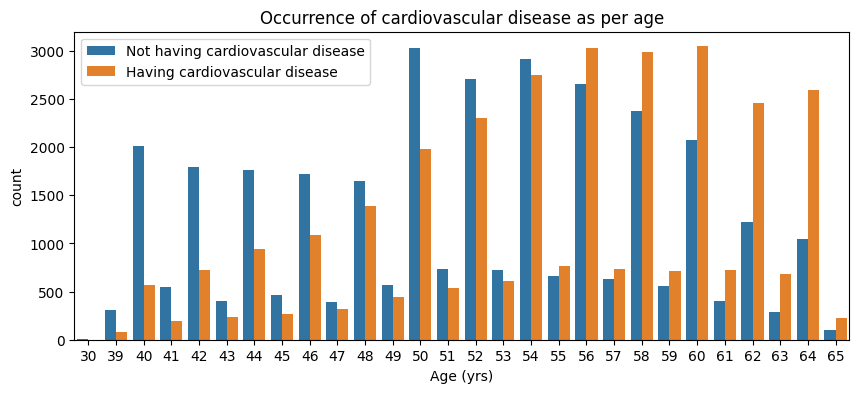

In [64]:
# Plotting age with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "cvd")
plt.title("Occurrence of cardiovascular disease as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

This analysis shows that with the increase in age, the problem of occuring cardiovascular disease is very high. The possibilities are highest above the age of 56.


### Analysis Of Gender

In [65]:
# Percentage of each value present in 'male' column.
df["male"].value_counts()/len(df["male"])*100

male
0    64.834069
1    35.165931
Name: count, dtype: float64

In this dataset, most of the patients are women. 65% are women and 35% are men.

In [66]:
df.groupby(by = "male").mean()

,id,age,height,weight,bmi,bmi_class,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol_intake,active,cvd
male,,,,,,,,,,,,,,
0,49874.133047,53.385460,161.803576,71.824086,27.494499,3.001119,125.573796,80.782970,0.375227,0.230549,0.017575,0.025150,0.801874,0.487483
1,50028.859648,53.113236,169.914611,76.027641,26.307867,2.769918,127.730554,82.120842,0.323120,0.203438,0.218737,0.105243,0.807778,0.493984


The above result shows that:
* Men are taller than women.
* Weight of men is more than women.
* Most often the systolic blood pressure is high in men above 120 than women.
* Most often the diastolic blood pressure is high in men above 80 than women.

### Analysis Of Gender With Respect To Blood Pressure

In [67]:
# Mean of gender with respect to the blood pressure.
df.groupby("male")[[ "ap_hi", "ap_lo"]].mean()

,ap_hi,ap_lo
male,,
0,125.573796,80.782970
1,127.730554,82.120842


This analysis shows that male patients mostly have high systolic and diastolic blood pressure in comparison to women. 

### Analysis Of Gender With Respect To Cholesterol Level

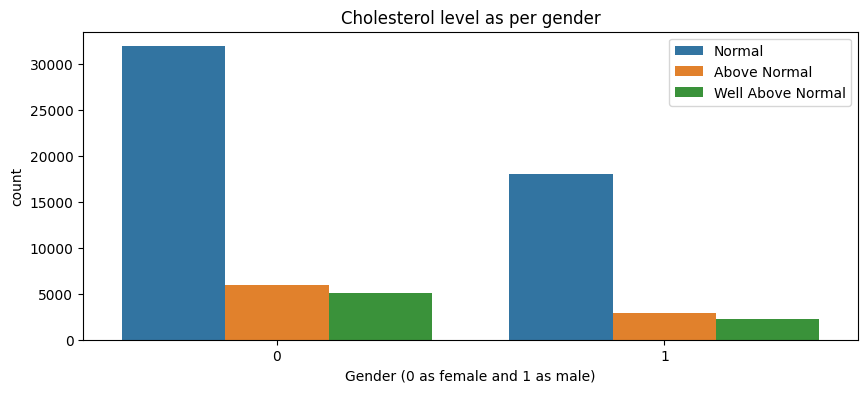

In [68]:
# Plotting gender with respect to cholesterol level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "male",  hue = "cholesterol")
plt.title("Cholesterol level as per gender")
plt.xlabel("Gender (0 as female and 1 as male)")
plt.legend(["Normal", "Above Normal", "Well Above Normal"])

This analysis shows that most of the male and female patients have normal cholesterol level whereas the number of patients having cholesterol level above normal and well above normal is low. The data of number of female patients present in the dataset is higher than that of male patients, so that's why we cannot compare the cholesterol level of male and female with each other.

### Analysis Of Gender With Respect To Glucose Level

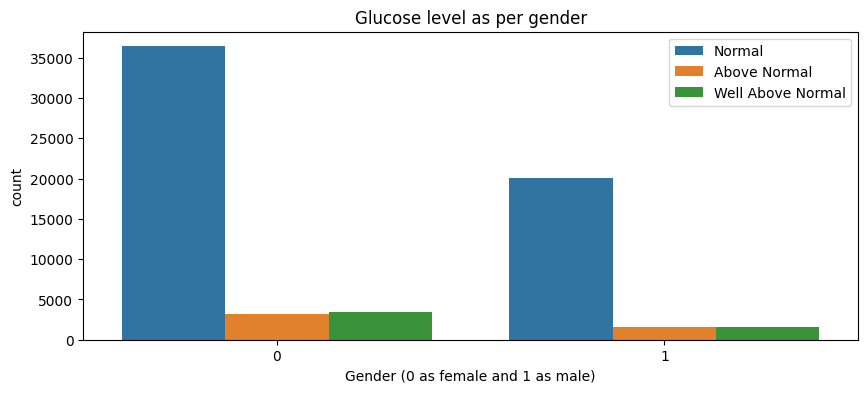

In [69]:
# Plotting gender with respect to glucose level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "male",  hue = "glucose")
plt.title("Glucose level as per gender")
plt.xlabel("Gender (0 as female and 1 as male)")
plt.legend(["Normal", "Above Normal", "Well Above Normal"])

This analysis shows that most of the male and female patients have normal glucose level whereas the number of patients having glucose level above normal and well above normal is low. The data of number of female patients present in the dataset is higher than that of male patients, so that's why we cannot compare the glucose level of male and female with each other.

### Analysis Of Gender With Respect To Smoking

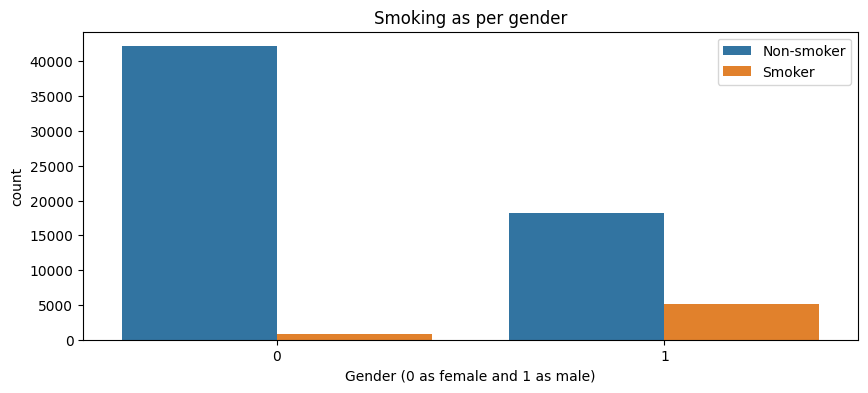

In [70]:
# Plotting gender with respect to smoking.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "male",  hue = "smoke")
plt.title("Smoking as per gender")
plt.xlabel("Gender (0 as female and 1 as male)")
plt.legend(["Non-smoker", "Smoker"])

This analysis shows that most of the male and female patients don't smoke. The frequency of males who smoke are much higher than that of women. The data of number of female patients present in the dataset is higher than that of male patients, so that's why we cannot compare the smoking population of male and female with each other.

### Analysis Of Gender With Respect To Alcohol Consumption

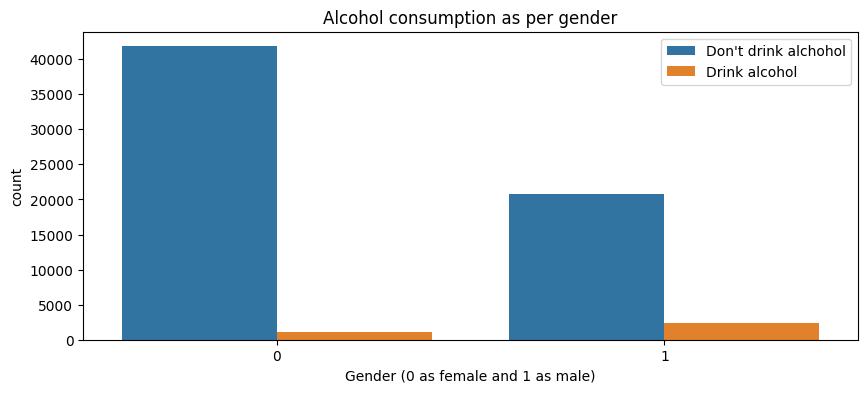

In [71]:
# Plotting gender with respect to smoking.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "male",  hue = "alcohol_intake")
plt.title("Alcohol consumption as per gender")
plt.xlabel("Gender (0 as female and 1 as male)")
plt.legend(["Don't drink alchohol", "Drink alcohol"])

This analysis shows that most of the male and female patients don't drink alcohol. The frequency of male who drink are much higher than that of women. The data of number of female patients present in the dataset is higher than that of male patients, so that's why we cannot clearly compare the alcohol consumption of male and female with each other.

### Analysis Of Gender With Respect To Physical Activity

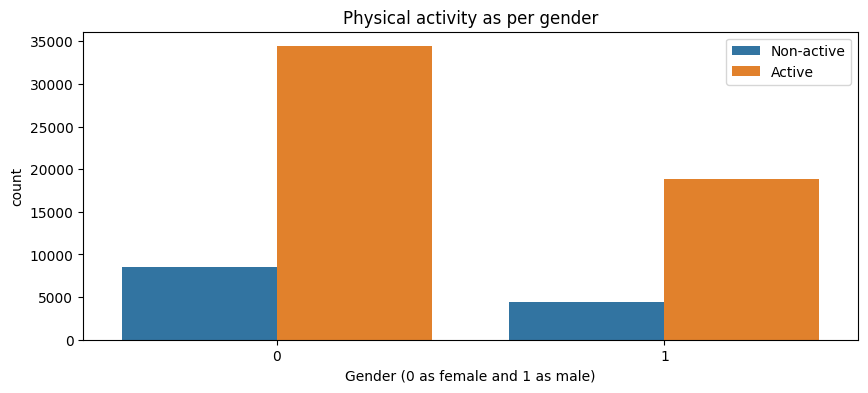

In [72]:
# Plotting gender with respect to physical activity.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "male",  hue = "active")
plt.title("Physical activity as per gender")
plt.xlabel("Gender (0 as female and 1 as male)")
plt.legend(["Non-active", "Active"])

This analysis shows that most of the male and female patients do regular physical activity. The data of number of female patients present in the dataset is higher than that of male patients, so that's why we cannot compare the physical activity of male and female with each other.

### Analysis Of Gender With Respect To Occurrence Of Cardiovascular Disease

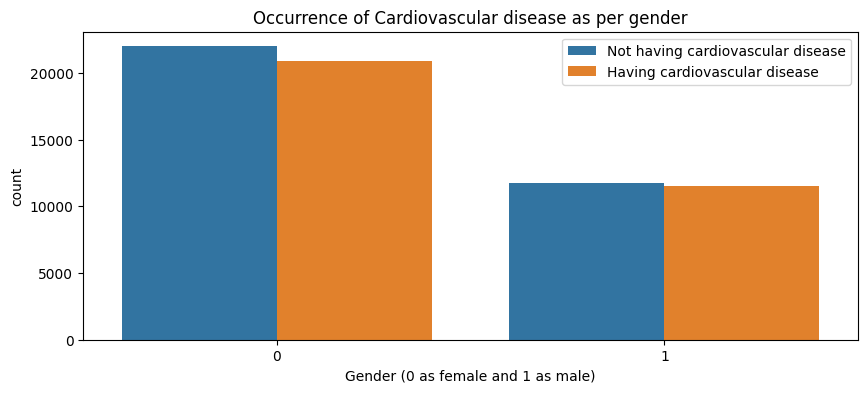

In [73]:
# Plotting gender with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "male",  hue = "cvd")
plt.title("Occurrence of Cardiovascular disease as per gender")
plt.xlabel("Gender (0 as female and 1 as male)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

This analysis shows that approximately equal proportion of male and female are having and not having cardiovascular disease. The data of number of female patients present in the dataset is higher than that of male patients, so that's why we cannot compare the occurrence of cardiovascular disease in male and female with each other.

### Analysis Of Height With Respect To Occurrence Of Cardiovascular Disease

In [74]:
# Mean of heights of the patient having and not having cardiovascular disease.
df.groupby("cvd")[[ "height"]].mean()

,height
cvd,
0,164.768593
1,164.538492


This analysis shows that mostly the height of the patients are normal and that's why have no special effect is seen on the occurrence of cardiovascular disease due to height.

### Analysis Of Weight With Respect To Occurrence Of Cardiovascular Disease

In [75]:
# Mean of weights of the patient having and not having cardiovascular disease.
df.groupby("cvd")[[ "weight"]].mean()

,weight
cvd,
0,71.127348
1,75.568129


This analysis shows that most of the patients having more weight will have higher chances of having cardiovascular disease.

### Analysis Of BMI With Respect To Occurrence Of Cardiovascular Disease

In [76]:
# Mean of BMI of the patients having and not having cardiovascular disease.
df.groupby("cvd")[[ "bmi"]].mean()

,bmi
cvd,
0,26.222078
1,27.968066


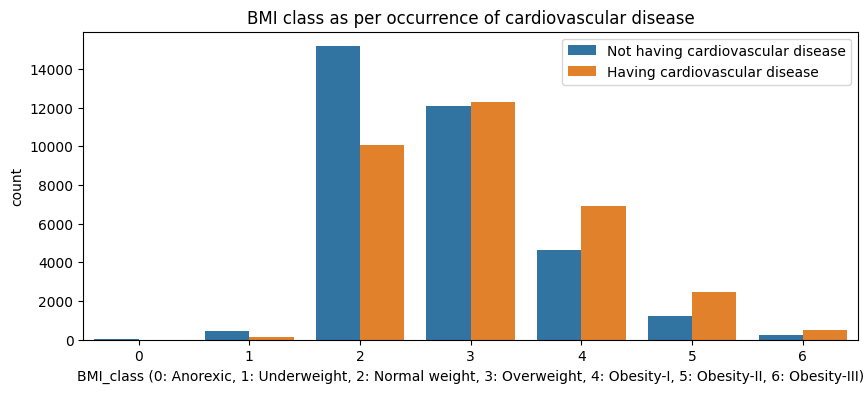

In [77]:
# Plotting BMI class with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "bmi_class",  hue = "cvd")
plt.title("BMI class as per occurrence of cardiovascular disease")
plt.xlabel("BMI_class (0: Anorexic, 1: Underweight, 2: Normal weight, 3: Overweight, 4: Obesity-I, 5: Obesity-II, 6: Obesity-III)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])


This analysis shows that the patients who are overweight and obese have more risk to cardiovascular disease. The chances of "not having cardiovascular disease" is higher than "having cardiovascular disease" in normal weight bmi range of class-2.

### Analysis Of Cholesterol Level With Respect To Occurrence Of Cardiovascular Disease

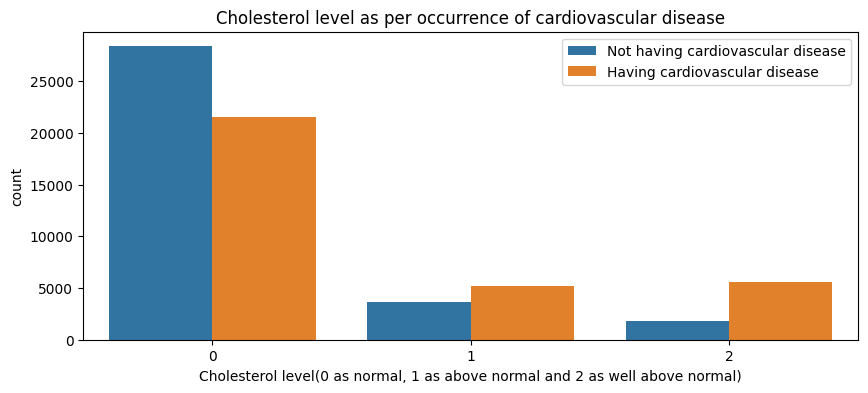

In [78]:
# Plotting cholesterol level with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "cholesterol",  hue = "cvd")
plt.title("Cholesterol level as per occurrence of cardiovascular disease")
plt.xlabel("Cholesterol level(0 as normal, 1 as above normal and 2 as well above normal)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

This analysis shows that the high number of patients having normal cholesterol level will have a moderate chance of having cardiovascular disease. But the small number of patients who have a above normal and a well above normal level of cholesterol will have a higher chance of having cardiovascular diesease.

### Analysis Of Glucose Level With Respect To Occurrence Of Cardiovascular Disease

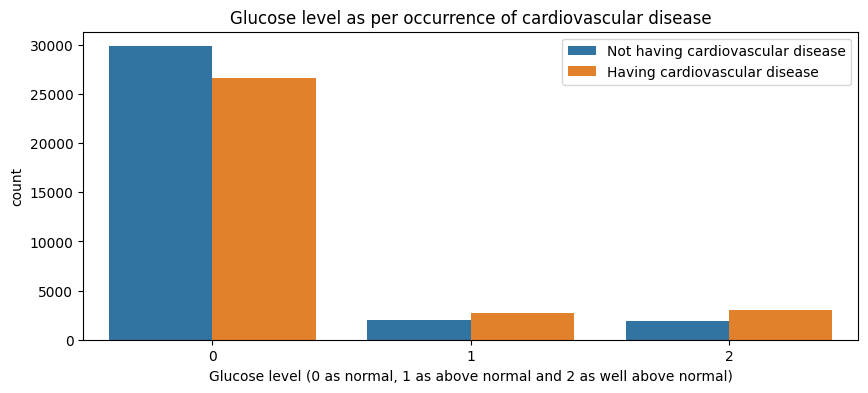

In [79]:
# Plotting glucose level with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "glucose",  hue = "cvd")
plt.title("Glucose level as per occurrence of cardiovascular disease")
plt.xlabel("Glucose level (0 as normal, 1 as above normal and 2 as well above normal)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

This analysis shows that the high number of patients having normal glucose level will have a moderate chance of having cardiovascular disease. But the small number of patients who have a above normal and a well above normal level of glucose will have a higher chance of having cardiovascular diesease.

### Analysis Of Smoking With Respect To Occurrence Of Cardiovascular Disease

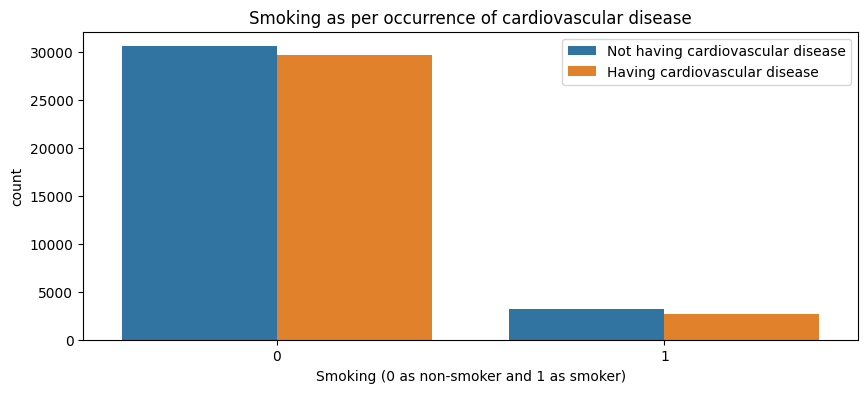

In [80]:
# Plot of smoking with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "smoke",  hue = "cvd")
plt.title("Smoking as per occurrence of cardiovascular disease")
plt.xlabel("Smoking (0 as non-smoker and 1 as smoker)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

This analysis shows that the patients who don't smoke will have a higher chance of having cardiovascular disease than those who smoke. This could be only possible if the patients who don't smoke are exposed to passive smoking or the environment in which he/she is living or working is polluted (mostly metropolitan cities and industrial areas).

### Analysis Of Alcohol Consumption With Respect To Occurrence Of Cardiovascular Disease

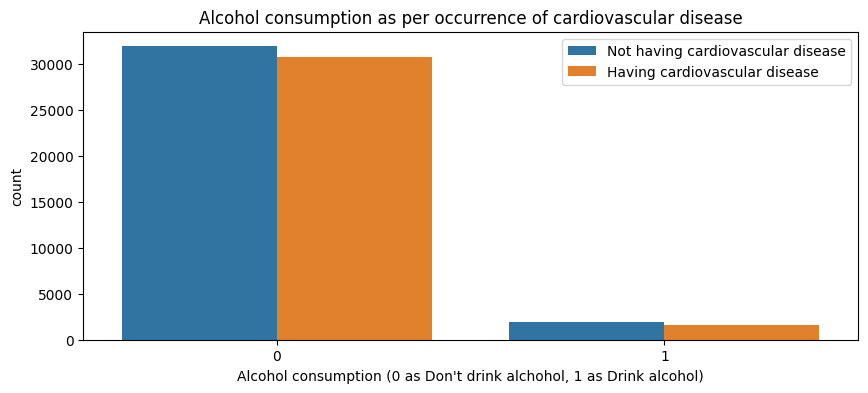

In [81]:
# Plotting alcohol consumption with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "alcohol_intake",  hue = "cvd")
plt.title("Alcohol consumption as per occurrence of cardiovascular disease")
plt.xlabel("Alcohol consumption (0 as Don't drink alchohol, 1 as Drink alcohol)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

This analysis shows that the patients who don't drink alcohol will have higher chances of having cardiovascular disease than those who drink alcohol. It is important to note that some of the patients in this dataset could be alcohol abstainers who previously drank excessively and had undermined their health. After they quit, they call themselves as non-alcoholic and categorized as non-drinkers, which in turn lead to more sick people in the non-drinkers category.

### Analysis Of Physical Activity With Respect To Occurrence Of Cardiovascular Disease

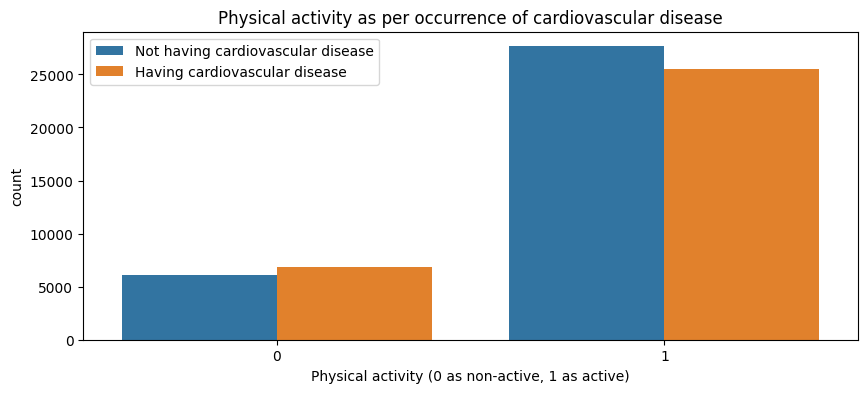

In [82]:
# Plotting physical activity with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "active",  hue = "cvd")
plt.title("Physical activity as per occurrence of cardiovascular disease")
plt.xlabel("Physical activity (0 as non-active, 1 as active)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

This analysis shows that non-active patients have higher chances of having cardiovascular disease whereas active patients have lower chances of having cardiovascular disease. But the dataset of 'Having cardiovascular disease' of active patients is higher than non-active patients because of the extreme strength-based laborious worklife conditions of the physically active patients. It means that the active patients mostly do high strength-based physical labour without any proper nutrition or guidance. This is also a fact, that this data could be examined from weight-lifters, wrestlers, fighters and atheletes because of their high-strength based work but there is one more fact associated, that these people mostly train themselves with proper guidance, routine and nutrition which decreases there chance of having cardiovascular disease. By observing this analysis, we can assume that this dataset is collected from manual labours because these labours do a lot of strength-based work without proper nutrition and health checkups.

# Assumptions
1. The patients having abnormal small height of below 148cm are at higher risk of Achondroplasia, also known as dwarfism and may have an increased or confirmed risk of cardiovascular disease.
2. The patients having abnormal tall height of above 200cm are at higher risk of atrial fibrillation and varicose veins related problems.
3. The patients having abnormal low weight of below 37kg, confirms their chance of having any particular medical condition (like dwarfism), due to which there is a high risk of cardiovascular disease.
4. The patients having abnormal high weight of above 110kg, confirms their chance of having any particular medical condition (like gigantism and acromegaly), due to which there is a high risk of cardiovascular disease.
5. When there is too much cholesterol in the blood, it builds up in the walls of the arteries, causing a process called atherosclerosis, a form of heart disease. The arteries become narrowed and bloodflow to the heart muscle is slowed down or blocked. This can cause chest pain (angina) or a heart attack. That's why high cholesterol level in adults can cause a serious problem.
6. High blood sugar levels can damage blood vessels and the nerves that control the heart over time, leading to an increased risk of heart diseases. 
7. The patients who don't smoke will have a higher chance of having cardiovascular disease, only if the patients who don't smoke are exposed to passive smoking or any polluted environment (such as metropolitan cities and industrial areas).
8. Some of the patients in this dataset could be alcohol abstainers who previously drank excessively and had undermined their health. After they quit, they call themselves as non-alcoholic and categorized as non-drinkers, which in turn lead to more sick people in the non-drinkers category.
9. The patients who do vigorous labor, have higher chances of having cardiovascular disease.

# Hypothesis
1. The old aged patient mostly are at higher risk of heart disease.
2. The high blood pressure, cholesterol and glucose level increases with age and can cause serious heart issues.
3. When the patients who don't smoke are exposed to passive smoking for a long period of time, can cause high risk of cardiovascular disease.
4. Those who do high strength based labor without proper nutrition, can cause serious risk of cardiovascular disease.


# Analysis And Findings
## Age
* The age of the patient of this dataset lies inclusively between the age-group of 30 to 65. 
* The age value of patients above 35 is very large and below 35 is very small.

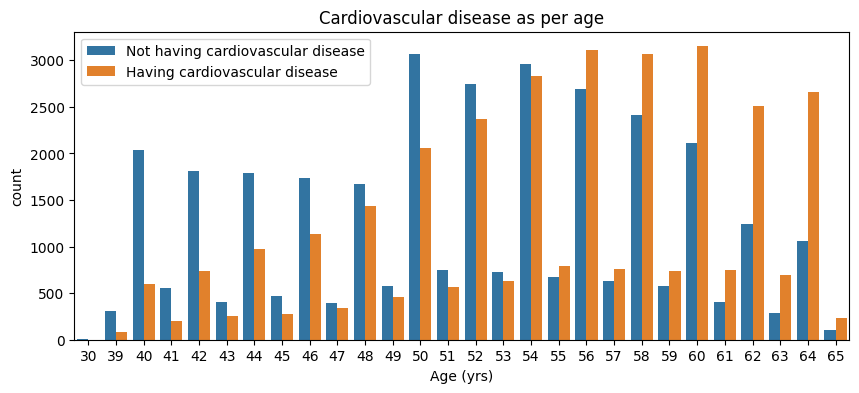

* The above graph shows that, with the increase in age the problem of occuring cardiovascular disease is very high. The possibilities are highest above the age of 56.


## Gender
* Most of the patients in the dataset are women. 65% are women and 35% are men.
* Men are taller than women.
* Weight of men is more than women.
* Most often the systolic blood pressure is high in men above 120, than women.
* Most often the diastolic blood pressure is high in men above 80, than women.

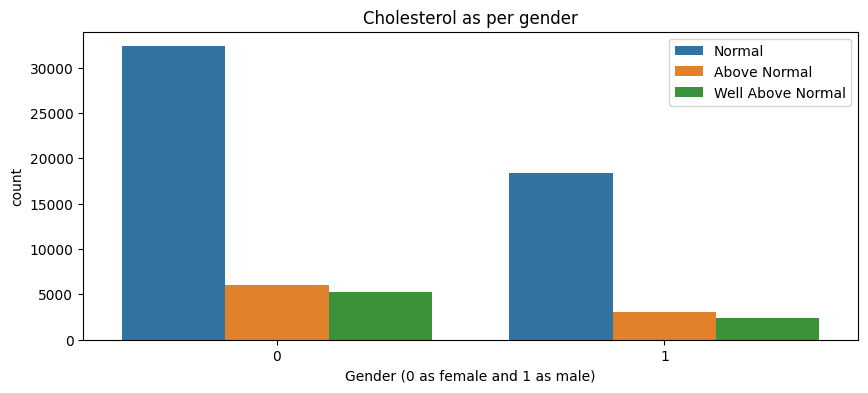

* The above graph shows that most of the male and female patients have normal cholesterol level whereas the number of patients having cholesterol level above normal and well above normal is low. The data of number of female patients present in the dataset is higher than that of male patients, so that's why we cannot compare the cholesterol level of male and female with each other.

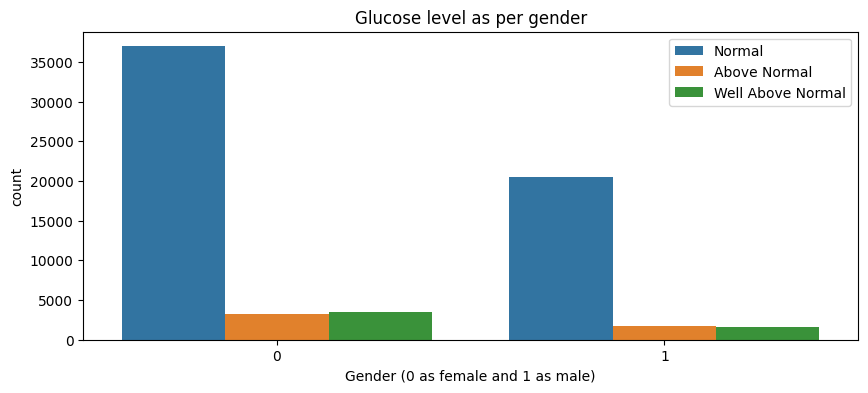

* The above graph shows that most of the male and female patients have normal glucose level whereas the number of patients having glucose level above normal and well above normal is low. The data of number of female patients present in the dataset is higher than that of male patients, so that's why we cannot compare the glucose level of male and female with each other.

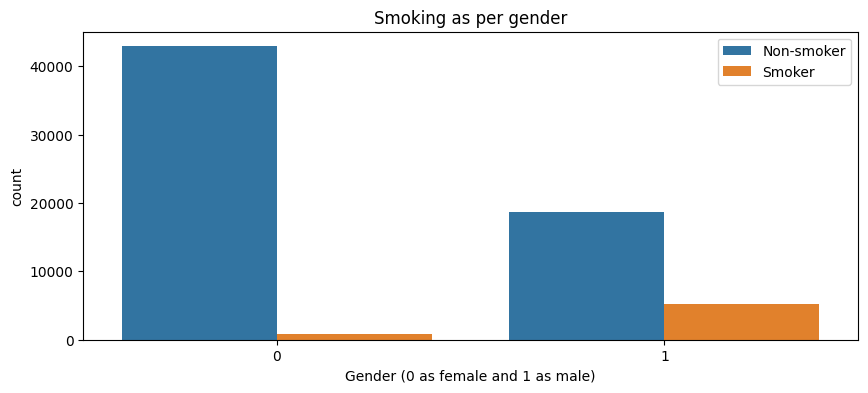

* In the above graph, most of the male and female patients don't smoke. The frequency of males who smoke are much higher than that of women. The data of number of female patients present in the dataset is higher than that of male patients, so that's why we cannot compare the smoking population of male and female with each other.

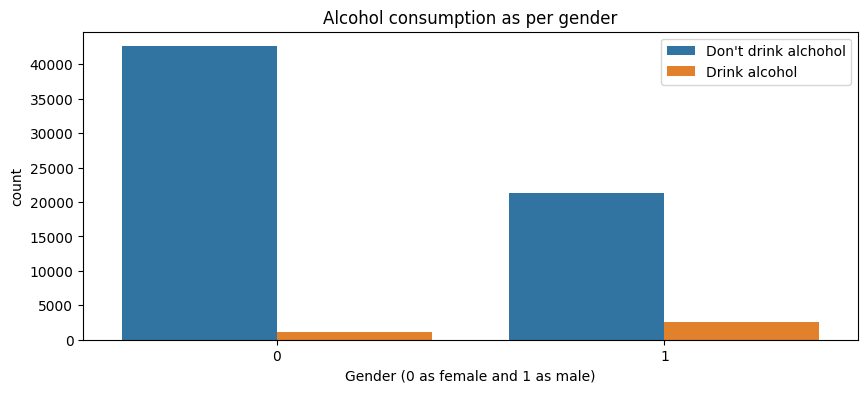

* In the above gaph, most of the male and female patients don't drink alcohol. The frequency of male who drink are much higher than that of women. The data of number of female patients present in the dataset is higher than that of male patients, so that's why we cannot clearly compare the alcohol consumption of male and female with each other.

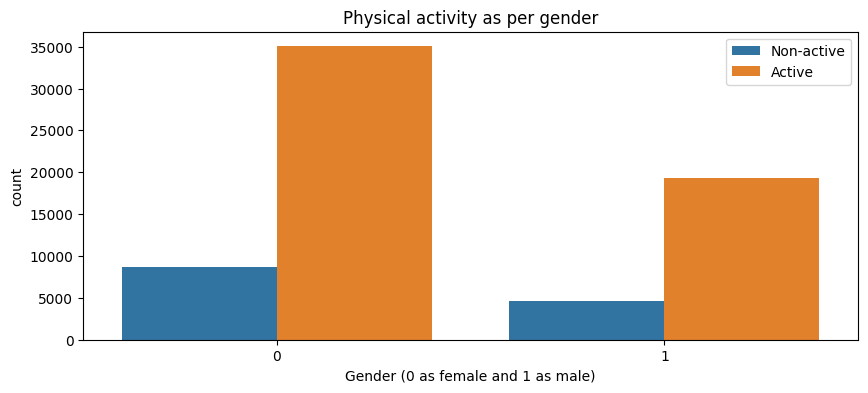

* In the above graph, most of the male and female patients do regular physical activity. The data of number of female patients present in the dataset is higher than that of male patients, so that's why we cannot compare the physical activity of male and female with each other.

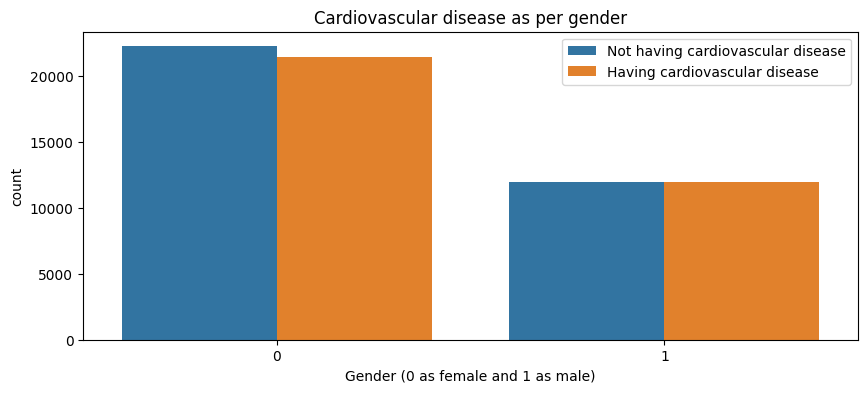

* The above graph demonstrates that approximately equal proportion of male and female are having and not having cardiovascular disease. The data of number of female patients present in the dataset is higher than that of male patients, so that's why we cannot compare the occurrence of cardiovascular disease in male and female with each other.


## Height
* For accurate analysis, the height values are considered exclusively between 148 to 200cm.
* In the dataset, mostly the height of the patients are in normal range and have no special effect on the occurrence of cardiovascular disease.


## Weight
* For accurate analysis, the weight values are considered exclusively between 37 to 110kg.
* The patients having more weight will have higher chances of having cardiovascular disease.


## BMI (Body-mass Index)
* The approximate percentage of patients having different BMI class are as follows:
    * (0) Anorexic: 0.02%
    * (1) Underweight: 0.90%
    * (2) Normal weight: 38.10%
    * (3) Overweight: 36.83%
    * (4) Obesity Class I: 17.46%
    * (5) Obesity Class II: 5.60%
    * (6) Obesity Class III: 1.09%

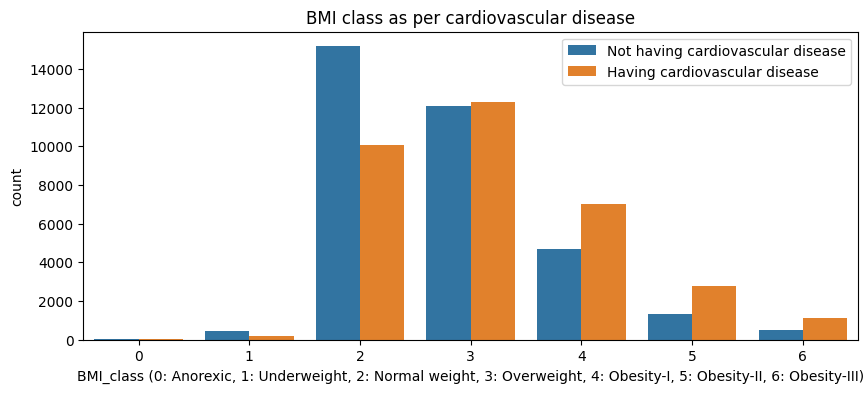

* The above graph shows that the patients who are overweight and obese, have more risk to cardiovascular disease. The chances of "not having cardiovascular disease" is higher than "having cardiovascular disease" in normal weight bmi range of class-2 and underweight bmi range of class-1.


## Blood Pressure

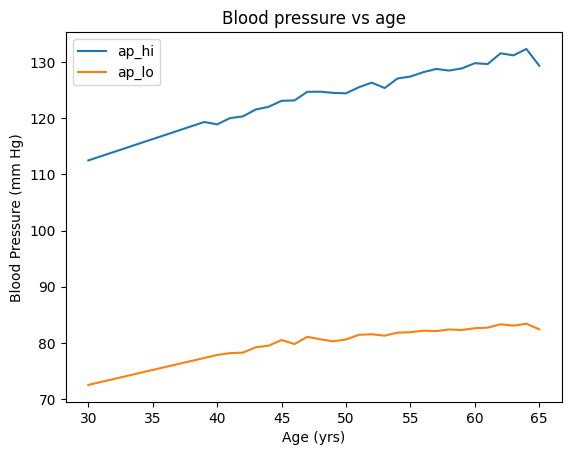  

* The accompanying line graph of age with respect to blood pressure shows that the blood pressure of the patients increases with age. The patients between the age of 30 to 65 years have an increasing diastolic pressure ranging between 70 to 80 mm Hg and increasing systolic pressure ranging between 110 to 135 mm Hg. 


## Cholesterol
* The 'cholesterol' column tells us the level of cholesterol of the patient which is categorised as:
    * 0 - Normal
    * 1 - Above Normal
    * 2 - Well Above Normal  

* In this dataset, approximately 75.5% of patients have normal, 13.4% have above normal and 11.2% have well above normal level of cholesterol.

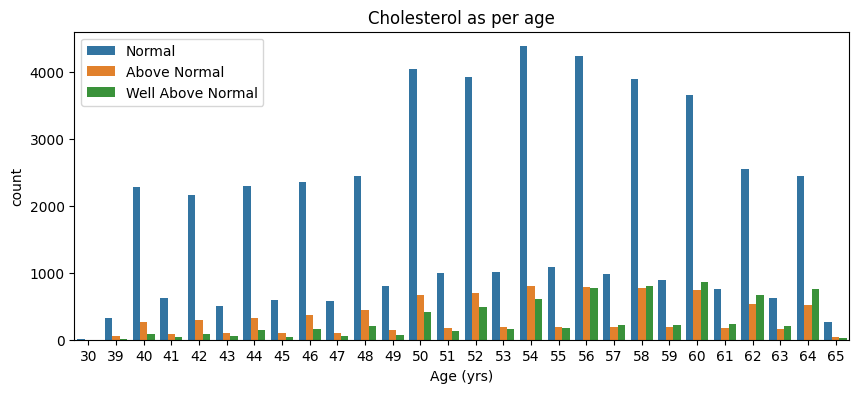

* The above bar graph shows that the cholesterol level increases with age and most of the patients have normal cholesterol level. The level of cholesterol of patients is above normal mostly at the age of 54 years and well above normal at the age of 60 years. When there is too much cholesterol in the blood, it builds up in the walls of the arteries, causing a process called atherosclerosis, a form of heart disease. The arteries become narrowed and bloodflow to the heart muscle is slowed down or blocked. This can cause chest pain (angina) or a heart attack. That's why high cholesterol level in adults can cause a serious problem.

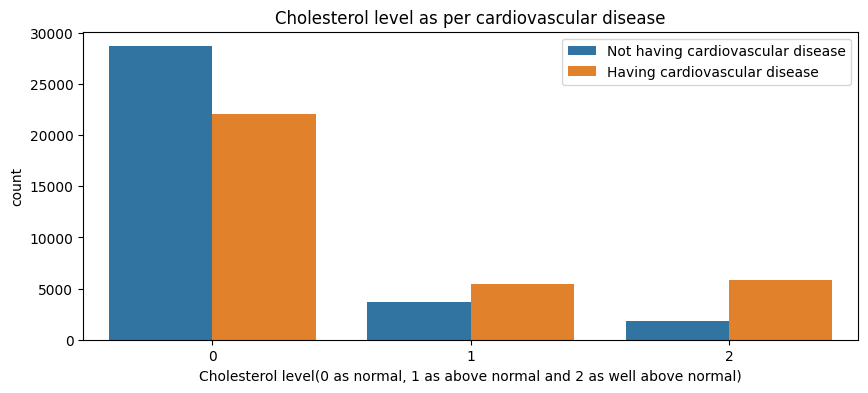

* The above graph demonstrates that the high number of patients having normal cholesterol level will have a moderate chance of having cardiovascular disease. But the small number of patients who have a above normal and a well above normal level of cholesterol will have a higher chance of having cardiovascular diesease.


## Glucose
* This 'gluc' column tells us the level of glucose in the patient which is categorised as:
    * 0 - Normal
    * 1 - Above Normal
    * 2 - Well Above Normal

* In this dataset, approximately 85.4% of patients have normal, 7.5% have above normal and 7.2% have well above normal level of glucose.

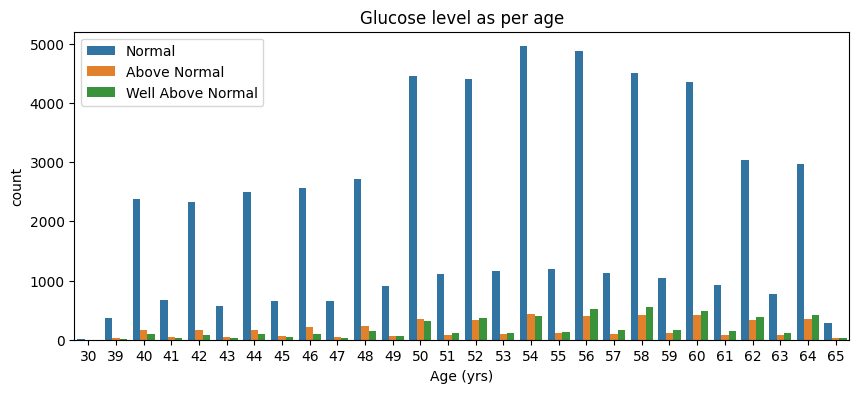

* The above graph demonstrates that glucose level of most of the patients are normal. The glucose level of patients increases to go above normal and well above normal mostly at the age of 50 years. High blood sugar levels can damage blood vessels and the nerves that control the heart over time, leading to an increased risk of heart diseases. 


## Smoking
* In this dataset, approximately 91.2% are non-smoker whereas 8.8% are smokers.

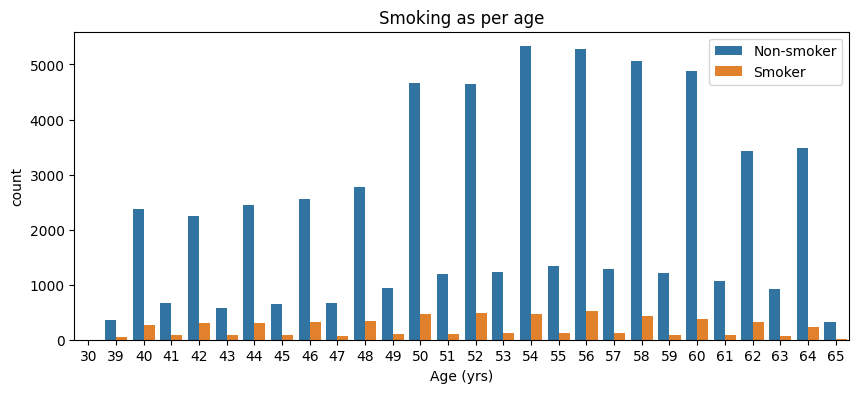

* Through the above graph, it can be observed that most of the patients don't smoke and with increase in age most of the adults don't prefer to smoke.

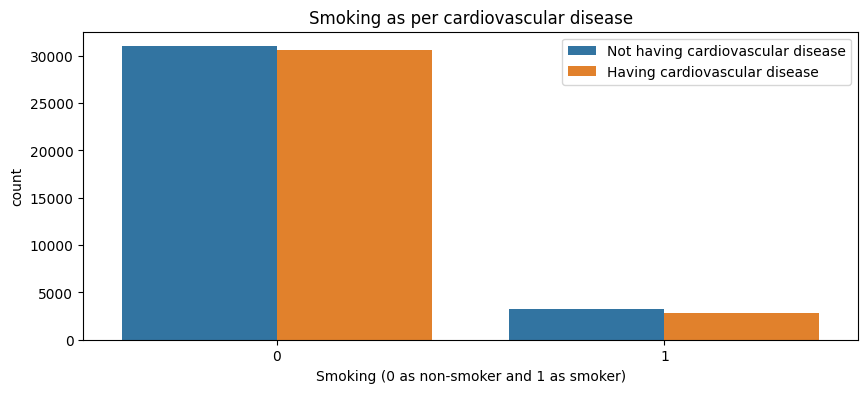

* The above graph shows that the patients who don't smoke will have a higher chance of having cardiovascular disease than those who smoke. This could be only possible if the patients who don't smoke are exposed to passive smoking or the environment in which the patient is living or working is polluted (mostly metropolitan cities and industrial areas).


## Alcohol Consumption
* In this dataset, approximately 94.7% of patient do not intake alcohol whereas 5.3% intake alcohol.

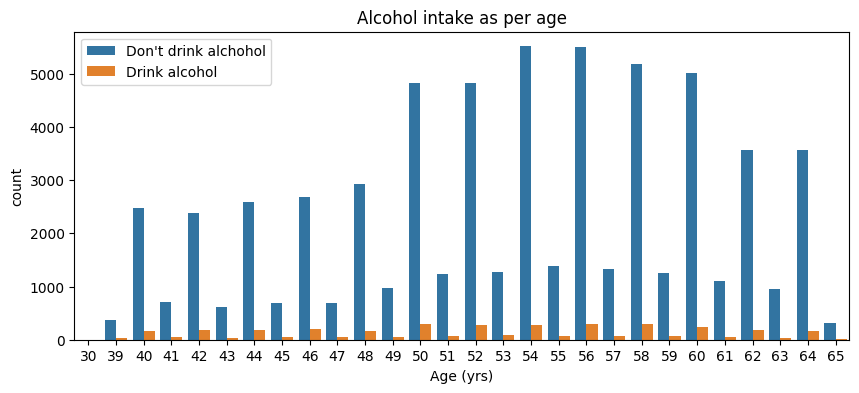

* Through the above graph, it can be observed that most of the patients don't drink alcohol and with increase in age most of the adults don't prefer to drink it.

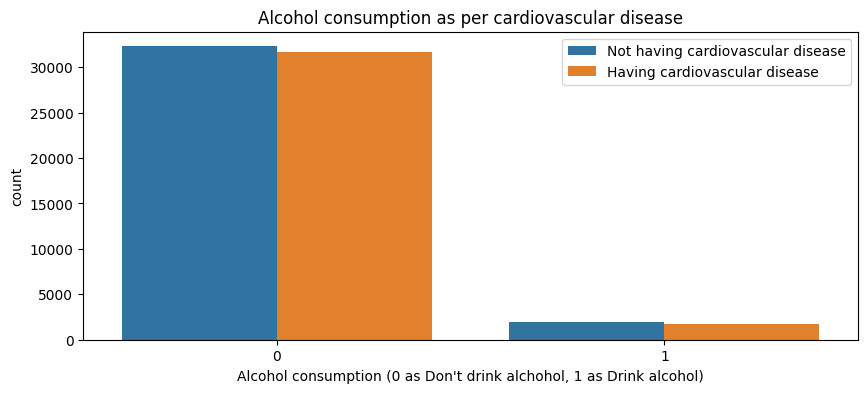

* The above graph shows that the patients who don't drink alcohol will have higher chance of having cardiovascular disease than those who drink alcohol. It is important to note that some of the patients in this dataset could be alcohol abstainers who previously drank excessively and had undermined their health. After they quit, they call themselves as non-alcoholic and categorized as non-drinkers, which in turn lead to more sick people in the non-drinkers category.


## Physical Activity
* In this dataset, approximately 80.4% of patient performs regular physical activity whereas 19.6% do not perform regular physical activity.

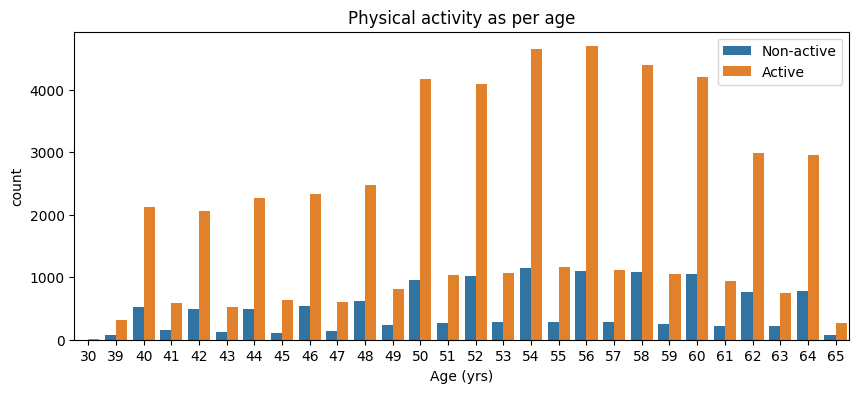

* In the above graph, it is demonstrated that most of the patients are physically active.

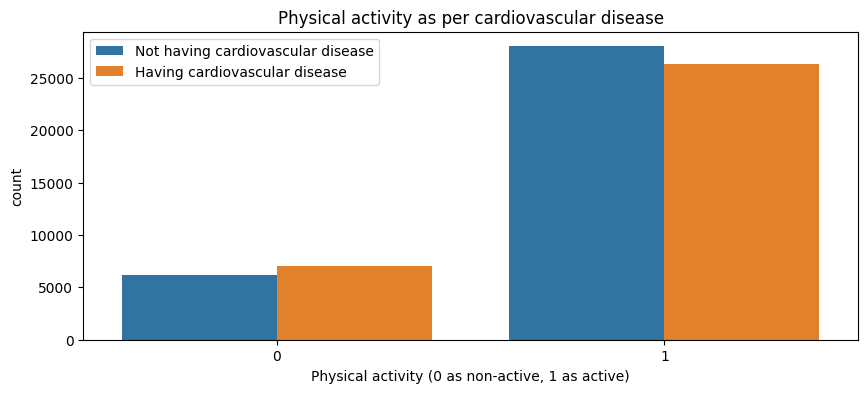

* The above graph demonstrates that non-active patients have higher chances of having cardiovascular disease whereas active patients have lower chances of having cardiovascular disease. But the dataset of 'Having cardiovascular disease' of active patients is higher than non-active patients because of the extreme strength-based laborious worklife conditions of the physically active patients. It means that the active patients mostly do high strength-based physical labour without any proper nutrition or guidance. This is also a fact, that this data could be examined from weight-lifters, wrestlers, fighters and atheletes because of their high-strength based work but there is one more fact associated, that these people mostly train themselves with proper guidance, routine and nutrition which decreases there chance of having cardiovascular disease. So that's why the patient of this dataset cannot be concluded as weight-lifters, wrestlers, fighters and atheletes. By observing this analysis, we can assume that this dataset is collected from manual labours because these labours do a lot of strength-based work without proper nutrition and health checkups.


## Presence Or Absence Of Cardiovascular Disease
* In this dataset, approximately 51% of patients do not have cardiovascular disease whereas 49% of patients suffers from cardiovascular disease.
